# ✈️ Predicción de Satisfacción de Pasajeros en Aerolíneas

En este trabajo práctico se abordará un problema de **clasificación binaria** utilizando un dataset que contiene evaluaciones de pasajeros sobre su experiencia en vuelos de aerolíneas.

El objetivo es desarrollar un modelo de *machine learning* que permita **predecir si un pasajero está satisfecho o no**, en base a múltiples factores, tales como:

- Tipo de viaje (`Type of Travel`)
- Clase del boleto (`Class`)
- Comodidad del asiento (`Seat comfort`)
- Servicio de WiFi a bordo (`Inflight wifi service`)
- Proceso de embarque online (`Online boarding`)
- Retrasos en salida o llegada (`Departure/Arrival Delay in Minutes`)

> 💡 **Motivación:** Este tipo de solución puede ser útil para aerolíneas que buscan **mejorar la experiencia del cliente**, identificar puntos críticos en sus servicios y **anticiparse a malas experiencias** mediante alertas o intervenciones proactivas.

## EDA (Exploratory Data Analysis)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones estéticas
sns.set(style="whitegrid")
plt.style.use("ggplot")

In [2]:
# Cargar el dataset
df = pd.read_csv("Invistico_Airline.csv")

# Mostrar las primeras filas
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


### 🧾 Información general del dataset

Este paso permite obtener una visión general de la estructura del dataset:

- Cantidad total de registros y columnas
- Nombre de cada columna
- Cantidad de valores no nulos por columna
- Tipo de dato de cada columna (`object`, `int64`, `float64`, etc.)

Este análisis sirve como base para:

- Detectar posibles columnas con valores nulos
- Identificar qué variables son categóricas o numéricas
- Evaluar el uso de memoria (útil si el dataset es muy grande)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

### 🔍 Análisis de valores nulos

Este paso permite identificar columnas que tienen datos faltantes (valores nulos) en el dataset.  
Esto es importante para decidir si los eliminamos, los imputamos o aplicamos algún otro tratamiento antes del modelado.

In [7]:
df.isnull().sum().sort_values(ascending=False)

Arrival Delay in Minutes             393
Inflight entertainment                 0
Departure Delay in Minutes             0
Online boarding                        0
Cleanliness                            0
Checkin service                        0
Baggage handling                       0
Leg room service                       0
On-board service                       0
Ease of Online booking                 0
Online support                         0
satisfaction                           0
Gender                                 0
Gate location                          0
Food and drink                         0
Departure/Arrival time convenient      0
Seat comfort                           0
Flight Distance                        0
Class                                  0
Type of Travel                         0
Age                                    0
Customer Type                          0
Inflight wifi service                  0
dtype: int64

### 🧼 Análisis y tratamiento de valores nulos en `Arrival Delay in Minutes`

Durante la etapa de análisis exploratorio de datos (EDA), se detectó que la columna `Arrival Delay in Minutes` contiene **393 valores nulos**, lo cual representa aproximadamente un **0.3% del total del dataset (129.880 registros)**.

Dado que esta variable puede aportar información valiosa al modelo de predicción de satisfacción (por ejemplo, se espera que los pasajeros con mayores retrasos estén más insatisfechos), **no se eliminó** directamente, sino que se evaluaron opciones de imputación.

#### 🔍 ¿Por qué imputar?

La imputación consiste en reemplazar los valores faltantes por un valor estimado. Algunas estrategias comunes incluyen:

- **Media**: adecuada cuando la variable tiene una distribución simétrica y sin valores extremos.
- **Mediana**: preferible cuando hay valores atípicos o una distribución sesgada, ya que es más robusta frente a outliers.

#### 📊 Análisis de la distribución

Para tomar una decisión informada, se analizó la distribución de la variable mediante un histograma con curva de densidad. Al observar el gráfico, se puede notar que:

- La mayoría de los retrasos está concentrada entre 0 y 10 minutos.
- Existen **outliers importantes**, con valores superiores a 1000 minutos.
- La distribución es claramente **sesgada a la derecha** (*right-skewed*).

#### ✅ Decisión final

Dado el comportamiento de la variable, se decidió imputar los valores nulos utilizando la **mediana**, por ser una medida representativa del "retraso típico" y menos sensible a valores extremos.

Este tratamiento permite conservar esos registros en el dataset sin introducir distorsiones estadísticas significativas.

In [14]:
# Estadísticas básicas para observar media, mediana y valores extremos
df['Arrival Delay in Minutes'].describe()

count    129487.000000
mean         15.091129
std          38.465650
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

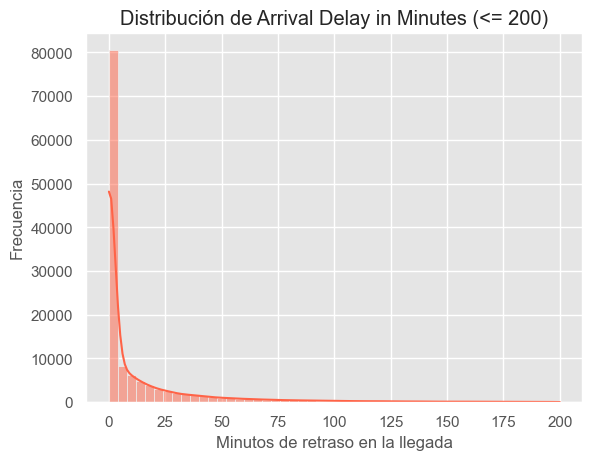

In [15]:
# Histograma truncado (hasta 200 minutos) para mejorar la visualización
sns.histplot(df[df['Arrival Delay in Minutes'] <= 200]['Arrival Delay in Minutes'], 
             kde=True, bins=50, color='tomato')

plt.title("Distribución de Arrival Delay in Minutes (<= 200)")
plt.xlabel("Minutos de retraso en la llegada")
plt.ylabel("Frecuencia")
plt.show()

#### 📊 Interpretación

Al observar las estadísticas descriptivas de la columna `Arrival Delay in Minutes`:

- **Mediana (50%)**: 0.0 → la mayoría de los vuelos **no tiene retrasos**
- **Media**: 15.1 minutos → afectada por outliers (retrasos muy altos)
- **Máximo**: 1584 minutos → valor extremadamente alto
- **Desviación estándar**: 38.5 → alta dispersión

Estos valores confirman lo observado en la visualización: la variable tiene una distribución **fuertemente sesgada a la derecha**, y por lo tanto **la mediana es una mejor opción para imputar valores faltantes**.

In [18]:
# 🧼 Imputación de los valores nulos con la mediana (0.0)
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median())

In [19]:
df['Arrival Delay in Minutes'].isnull().sum()

np.int64(0)

#### ✅ Aplicación de imputación

Finalmente, se imputaron los 393 valores nulos en la columna `Arrival Delay in Minutes` utilizando la **mediana** (0.0).  
Esto permite conservar los registros sin introducir sesgo causado por valores extremos.

Se verificó que ya no quedan valores faltantes en esta columna.

### 🎯 Análisis de la variable objetivo: `satisfaction`

La variable objetivo de este proyecto es `satisfaction`, que indica si el pasajero quedó **satisfecho** o **insatisfecho** con su experiencia en el vuelo.

Para comenzar el análisis, se evaluó la distribución de clases para verificar si el dataset está balanceado.

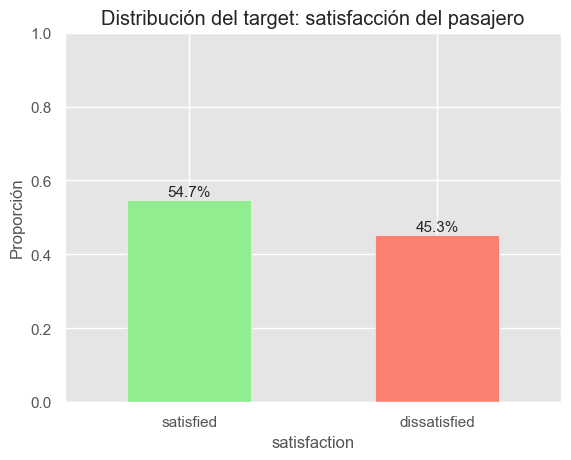

In [21]:
# Distribución de la variable objetivo (satisfaction)
proporciones = df['satisfaction'].value_counts(normalize=True)

ax = proporciones.plot(kind='bar', color=['lightgreen', 'salmon'])
plt.title("Distribución del target: satisfacción del pasajero")
plt.ylabel("Proporción")
plt.xticks(rotation=0)

# Agregar porcentajes sobre las barras
for i, valor in enumerate(proporciones):
    plt.text(i, valor + 0.01, f"{valor:.1%}", ha='center', fontsize=11)

plt.ylim(0, 1)  # para asegurar que los textos no se corten
plt.show()

#### 📊 Resultados:

- **54.7%** de los pasajeros están **satisfechos**
- **45.3%** están **insatisfechos** 

La distribución está relativamente balanceada.